In [1]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

In [2]:
#Import Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycaret as py
import seaborn as sns

In [3]:
data = pd.read_csv("concrete.csv")
data.head()

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0  270     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0  365     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5  360     44.30

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [9]:
duplicates = data.duplicated()
duplicates.value_counts()

False    1005
True       25
Name: count, dtype: int64

In [10]:
dropped_duplicates = data.drop_duplicates(subset = ["cement"],keep="first")
dropped_duplicates

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      540.0    0.0    0.0  162.0           2.5     1040.0    676.0   28   
2      332.5  142.5    0.0  228.0           0.0      932.0    594.0  270   
4      198.6  132.4    0.0  192.0           0.0      978.4    825.5  360   
5      266.0  114.0    0.0  228.0           0.0      932.0    670.0   90   
6      380.0   95.0    0.0  228.0           0.0      932.0    594.0  365   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1026   322.2    0.0  115.6  196.0          10.4      817.9    813.4   28   
1027   148.5  139.4  108.6  192.7           6.1      892.4    780.0   28   
1028   159.1  186.7    0.0  175.6          11.3      989.6    788.9   28   
1029   260.9  100.5   78.3  200.6           8.6      864.5    761.5   28   

      strength  
0        79.99  
2        40.27  
4        44.30  
5        47.03  
6        43.70  
...        ...  
1025     44.28  
1026     31.18  
1027     23.70  
1028     32.77  
1029     32.40  

[278 rows x 9 columns]

In [11]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<Figure size 1200x800 with 0 Axes>

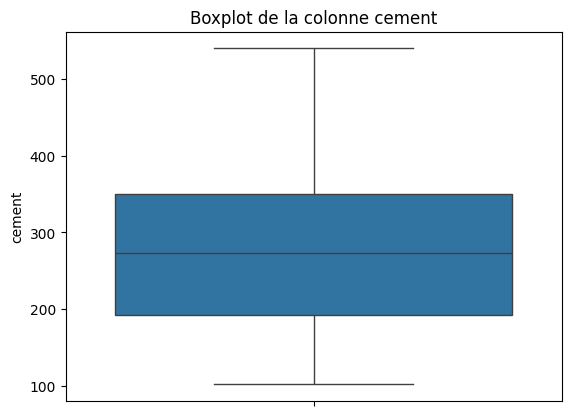

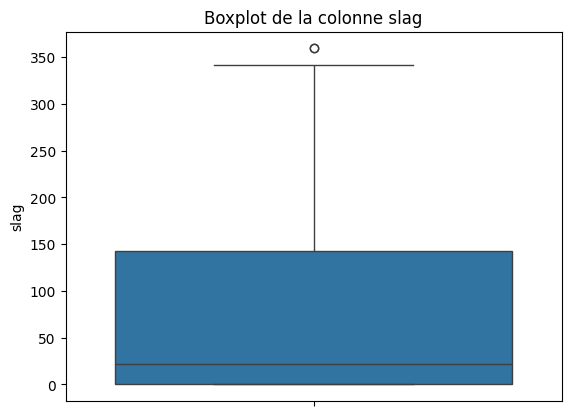

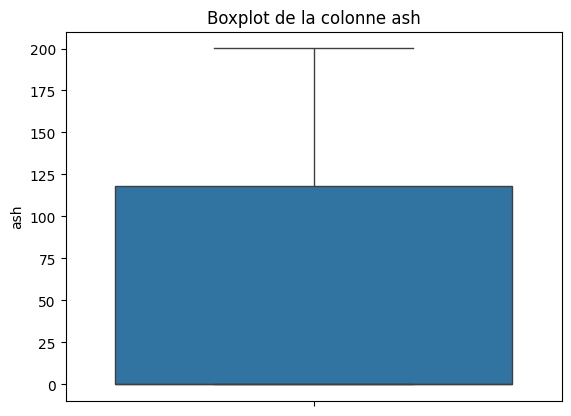

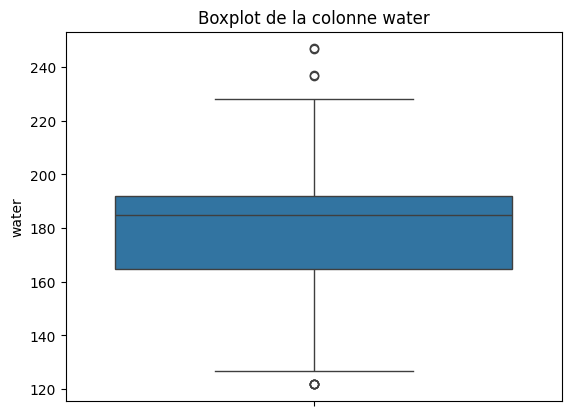

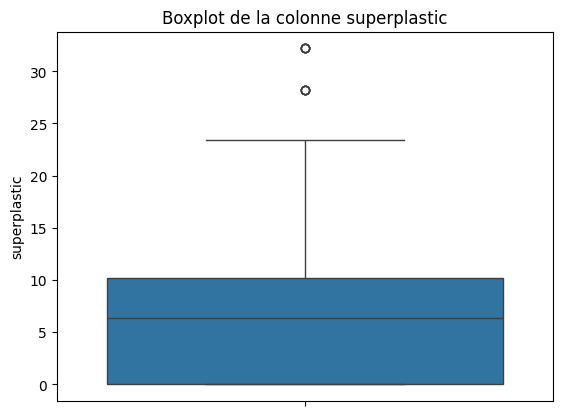

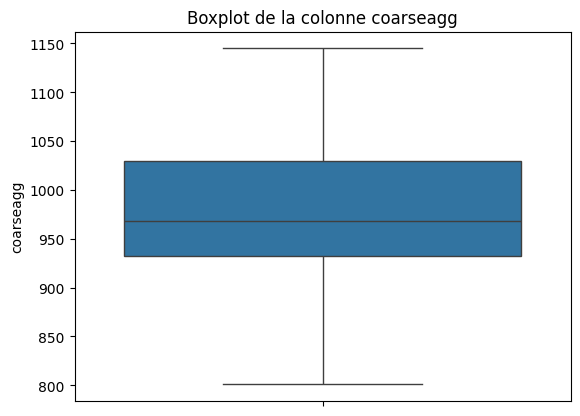

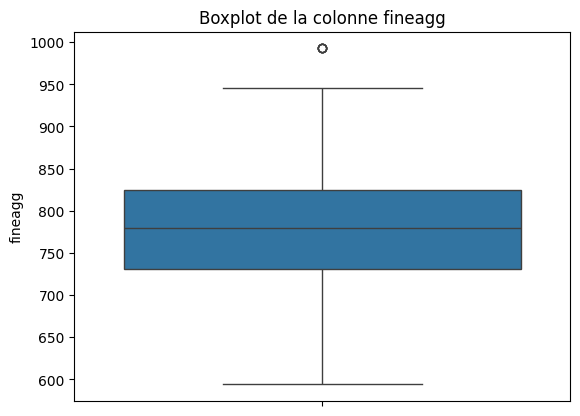

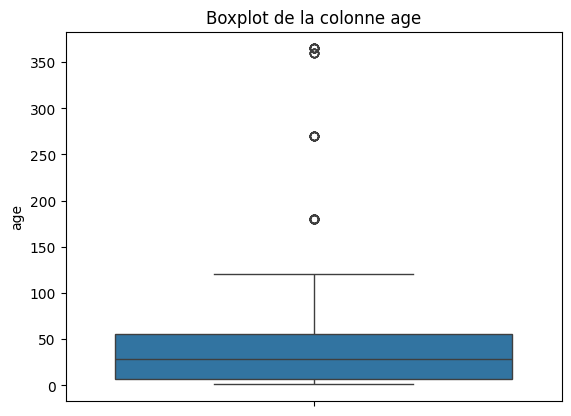

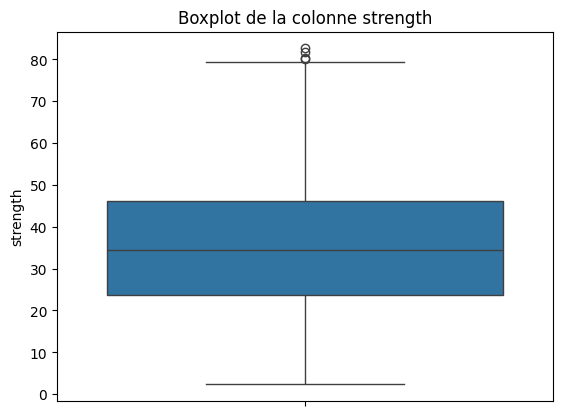

In [12]:
#Utilisation des boxplot pour visualiser les valeurs abérrantes

# Création des boxplots pour chaque colonne
plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.figure()
    sns.boxplot(data[column])
    plt.title(f"Boxplot de la colonne {column}")
    plt.show()

In [13]:
#gerer les outliers sur totals rooms
def replace_outliers(data, n_std=3):
    for column in data.columns:
        if data[column].dtype != 'object':  # Ignorer les colonnes catégorielles
            mean, std = data[column].mean(), data[column].std()
            cutoff = std * n_std
            lower, upper = mean - cutoff, mean + cutoff
            data[column] = np.where(data[column] < lower, lower, data[column])  # Remplacer par lower si en dessous du seuil
            data[column] = np.where(data[column] > upper, upper, data[column])  # Remplacer par upper si au-dessus du seuil
    return data

# Appliquer la fonction pour remplacer les outliers
data = replace_outliers(data)

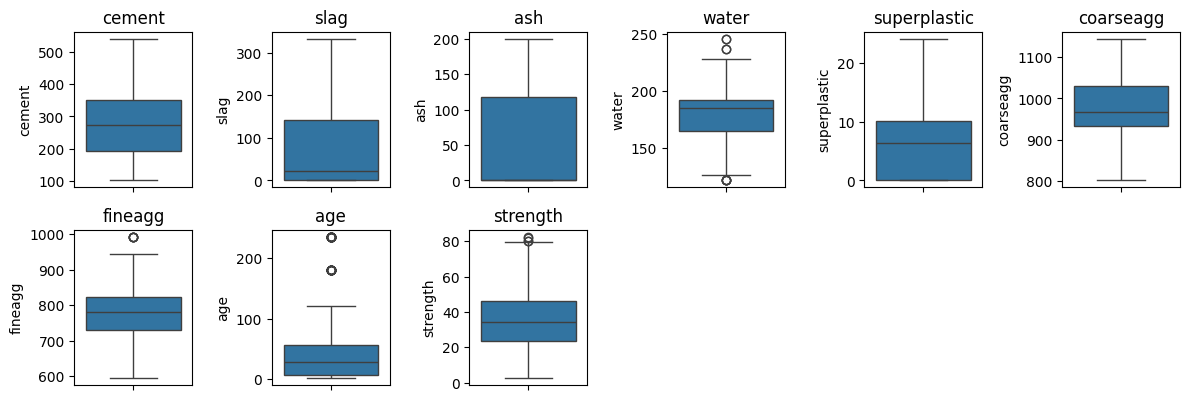

In [14]:
# Création d'un grand canvas
plt.figure(figsize=(12, 10))

# Tracer un boxplot pour chaque colonne
for i, col in enumerate(data.columns):
    plt.subplot(5, 6, i + 1)  # Adjust the grid size according to your number of columns
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
# init setup with normalize = True
from pycaret.regression import *
s = setup(data, target = 'strength', session_id = 123,
          normalize = True, normalize_method = 'minmax')

In [16]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=123)

In [17]:
best_model=create_model("lightgbm")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LGBMRegressor(n_jobs=-1, random_state=123)

In [20]:
import pickle

In [21]:
pickle.dump(best_model, open('concrete.pkl', 'wb'))